#  Добавление элементов на график

Добавление элементов реализовано через методы с префиксом `set_`. Добавить можно очень много разных элементов - метки оси, предельные значения и т.д.

Подготовка данных:

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем столбец с таймстемпом
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head()

,air_quality.csv,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ts
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


Отрисовка графика

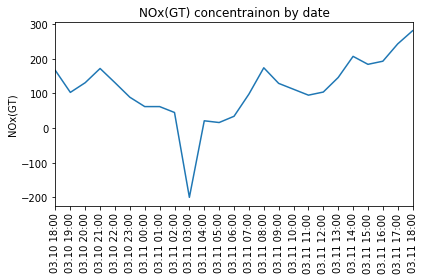

In [4]:
import numpy as np
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

register_matplotlib_converters()
# доступ к Figure и Subplot
fig, subplot = plt.subplots()
TOP=25
# формируем значения по оси  X
x_ticks = air_df['ts'].values[:TOP]
# формируем значения по оси Y
y_ticks = air_df['NOx(GT)'].values[:TOP]
# график функции
subplot.plot(x_ticks, y_ticks)
# подписываем график
subplot.set_title('NOx(GT) concentrainon by date')
# станавливаем название для оси  OX
subplot.set_ylabel('NOx(GT)')
# подписи для оси Ох
x_labels = [pd.to_datetime(str(i)).strftime("%m.%d %H:%M") for i in air_df['ts'].values[:TOP]]
# добавляем подписи к осям
plt.xticks(x_ticks, rotation='vertical', labels=x_labels)
# устанавливаем границы по оси oX
x_min = air_df['ts'].values[0]
x_max = air_df['ts'].values[TOP-1]
# строим график
subplot.set_xlim(left=x_min, right=x_max)
fig.tight_layout()
 
plt.show()

График стал выглядеть более хорошо:

* оси подписаны
* есть заголовок
* метки на оси oX развернуты вертикально
